In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.deterministic import DeterministicProcess

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
data = pd.read_csv('data/NFLX.csv', index_col='Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000


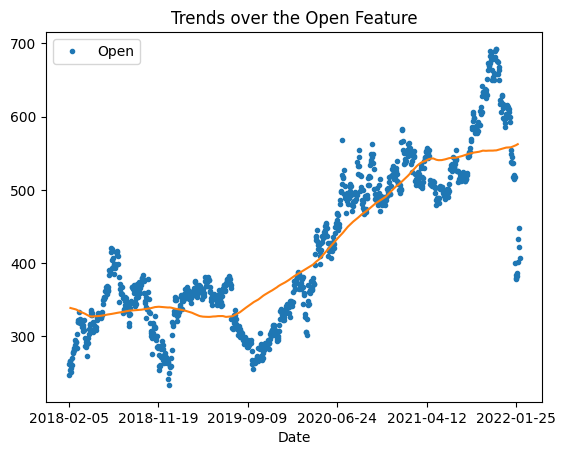

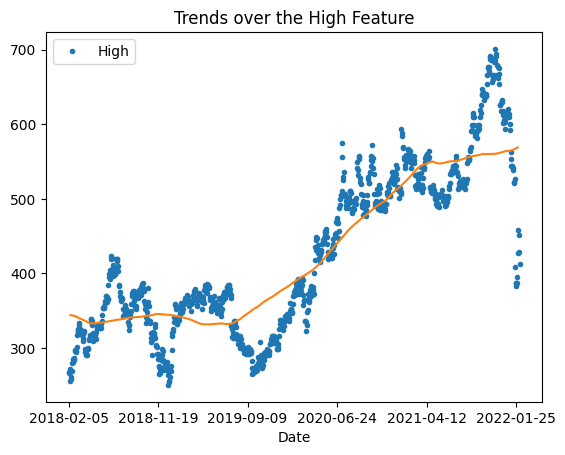

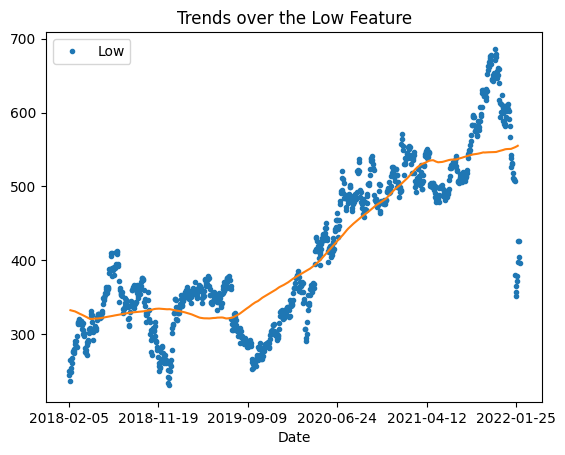

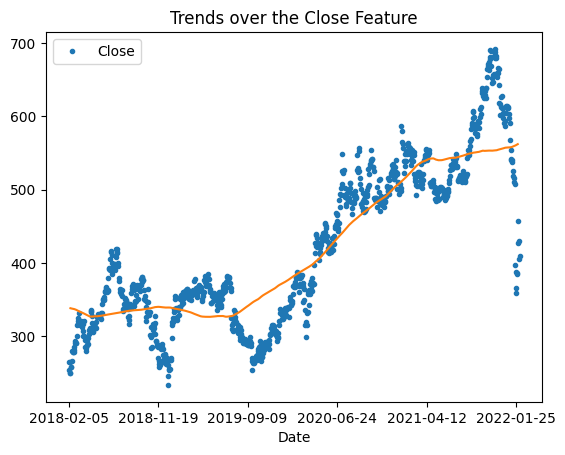

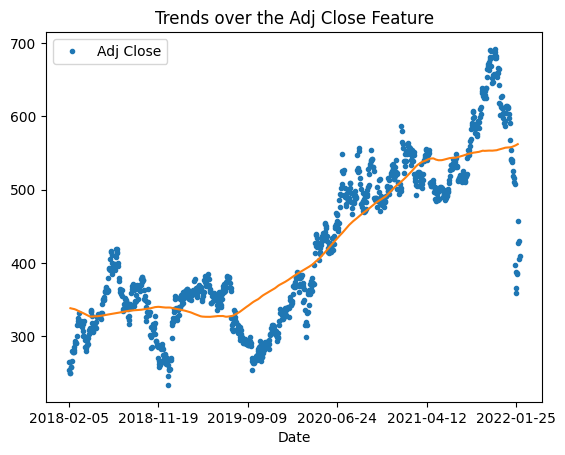

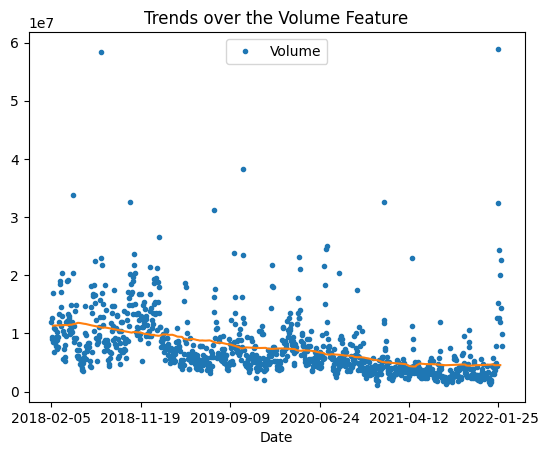

In [11]:
moving_average = data.rolling(
    window=365,
    center=True,
    min_periods=187
).mean()

for column in data.columns.to_list():
    ax = data.loc[:, [column]].plot(style=".")
    moving_average.loc[:, [column]].plot(
        ax=ax,
        title=f'Trends over the {column} Feature',
        legend=False
    )

### TRAINING A TREND MODEL

In [12]:
dp = DeterministicProcess(
    index=data.index,
    constant=True,
    order=1,
    drop=True
)

X = dp.in_sample()
X

,const,trend
Date,,
2018-02-05,1.0,1.0
2018-02-06,1.0,2.0
2018-02-07,1.0,3.0
2018-02-08,1.0,4.0
2018-02-09,1.0,5.0
...,...,...
2022-01-31,1.0,1005.0
2022-02-01,1.0,1006.0
2022-02-02,1.0,1007.0


<AxesSubplot: xlabel='Date'>

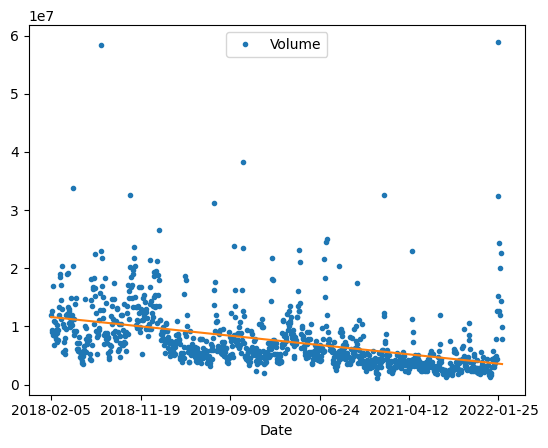

In [13]:
y = data['Volume']

trend_model = LinearRegression(fit_intercept=False)
trend_model.fit(X, y)
y_pred = pd.Series(trend_model.predict(X), index=X.index)

ax = data.loc[:, ['Volume']].plot(style=".")
y_pred.plot(ax=ax)

/home/luan/anaconda3/envs/time-series/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<AxesSubplot: xlabel='Date'>

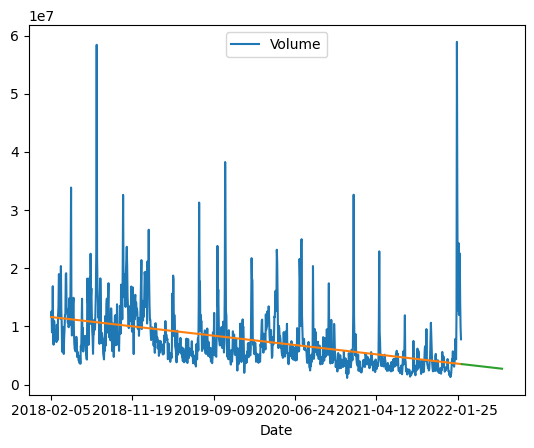

In [19]:
X = dp.out_of_sample(steps=100)
y_fore = pd.Series(trend_model.predict(X), index=X.index)

ax1 = data[:].loc[:, ['Volume']].plot()
ax2 = y_pred[:].plot(ax=ax1)
y_fore.plot(ax=ax2)